# Complex projective coordinates on data set of image patches

In this example, we explore the topology of a collection of images of a moving dot, which, as we will show using persistent cohomology and complex projective coordinates, are parametrized by the 2-sphere.
Each image patch is a square $d \times d$ region of pixels.
Each pixel can be thought of as a dimension, so each patch lives in $\mathbb{R}^{d \times d}$, and a collection of patches can be thought of as a Euclidean point cloud in $\mathbb{R}^{d \times d}$.

In [1]:
from dreimac import GeometryExamples, PlotUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils

import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

Let's start by looking at a small sample of image patches

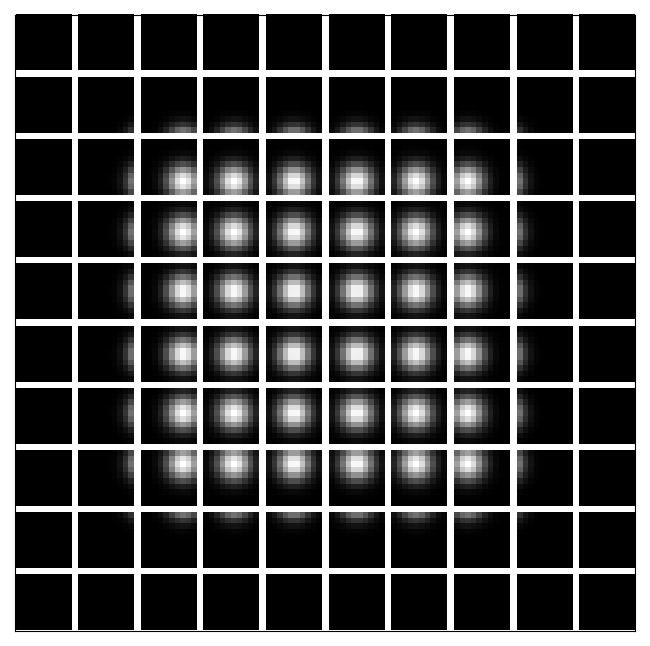

In [2]:
small_sample = GeometryExamples.moving_dot(10, sigma=2)

plt.figure(figsize=(8,8))
_ = PlotUtils.plot_patches(small_sample, zoom=4)

The topology of the data is best captured by approximations of the geodesic distance. This is what the function `landmark_geodesic_distance` does.

In [3]:
P = GeometryExamples.moving_dot(100, sigma=2)
dist_mat, pointcloud_permutation = GeometryUtils.landmark_geodesic_distance(P, 300, 20)

As we can see, the data has one high-prominence 2-dimensional void.

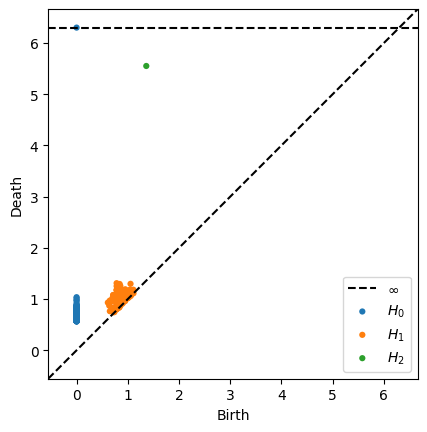

In [4]:
cpc = ComplexProjectiveCoords(dist_mat, n_landmarks=300, distance_matrix=True)
fig = plt.figure()
plot_diagrams(cpc._dgms)

We now apply complex projective coordinates.

In [5]:
coords = cpc.get_coordinates(perc=0.9, proj_dim=1, cocycle_idx=0)
coords_R3 = ProjectiveMapUtils.hopf_map(coords)
coords_R2 = ProjectiveMapUtils.stereographic_projection_hemispheres(coords_R3)

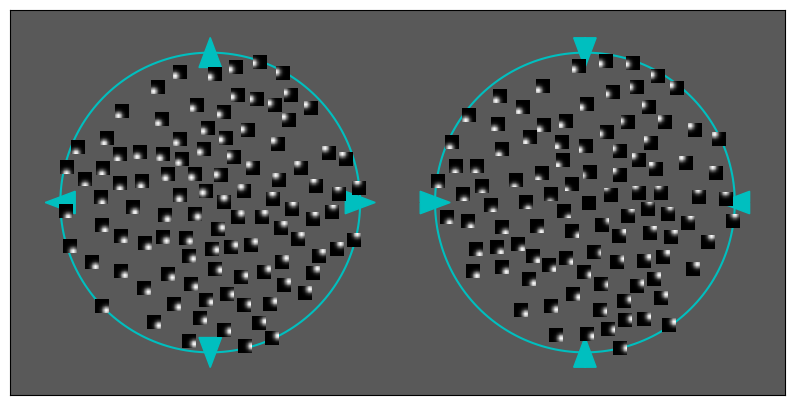

In [6]:
subsample = GeometryUtils.get_greedy_perm_pc(coords_R2, 200)['perm']

plt.figure(figsize=(10, 5))
PlotUtils.imscatter(coords_R2[subsample], P[pointcloud_permutation][subsample], 10)
_ = PlotUtils.plot_2sphere_boundary()